In [1]:
import os
import matplotlib.pyplot as plt
import re
import pandas as pd

from data_analyse.preprocesser import load_skills

%matplotlib inline

Preparing data

In [2]:
def remove_not_letters(text:str):
    cleaned_text = re.sub(r"[^a-z]", " ", str(text))
    cleaned_text = re.sub(r"\s+", " ", cleaned_text)
    return cleaned_text

csv_path = os.path.join(os.pardir, "linkedin/output.csv")
df = pd.read_csv(csv_path, usecols=["text"])
df["text"] = df["text"].str.lower()
df["text"] = df["text"].apply(remove_not_letters)
df.dropna(inplace=True)

Skills finding

In [3]:
def word_check(row, word):
    return 1 if f" {word} " in f" {row['text']} " else 0

skills = load_skills()
skill_table = pd.DataFrame()

for skill in skills:
    skill_table[skill] = df.apply(word_check, axis=1, args=(skill,))

result_df = pd.concat([df, skill_table], axis=1)
result_df

,text,django,fastapi,rest,css,javascript,typescript,http,docker,sql,react,nodejs,linux,scrapy,ubuntu,postgresql,nosql
0,section class show more less html data max li...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,section class show more less html data max li...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,section class show more less html data max li...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,section class show more less html data max li...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,section class show more less html data max li...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
5,section class show more less html data max li...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
6,section class show more less html data max li...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
7,section class show more less html data max li...,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0
8,section class show more less html data max li...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
9,section class show more less html data max li...,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1


Representation of results

In [4]:
sum_table = pd.DataFrame(skill_table.sum(), columns=["Total"])
sum_table.loc["total"] =  len(skill_table)
sum_table = sum_table.sort_values(by="Total", ascending=False)
sum_table

,Total
total,18
linux,11
ubuntu,10
javascript,6
css,5
typescript,5
docker,5
react,5
nosql,3
rest,2


Plot

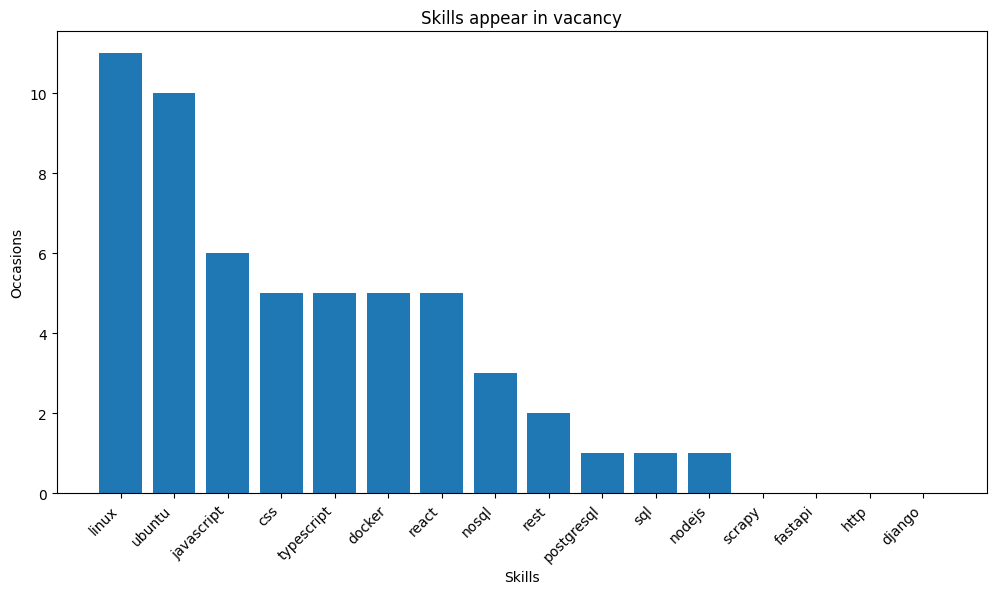

In [11]:
from matplotlib.ticker import MaxNLocator

occasions = sum_table.iloc[:, 0].to_list()
occasions = occasions[1:]
skills = sum_table.index.to_list()
skills = skills[1:]
plt.figure(figsize=(12, 6))
plt.bar(x=skills, height=occasions)
plt.xlabel("Skills")
plt.ylabel("Occasions")
plt.title("Skills appear in vacancy")
plt.xticks(rotation=45, ha="right")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()